In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.shape

(15, 2)

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


***Checking NULL values*** 

In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

***Dropping Duplicates***

In [ ]:
df = df.drop_duplicates()

***Checking datatypes***


In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

***Checking Linear Relationship***

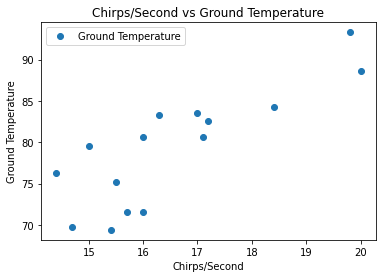

In [ ]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


There is a linear relationship between chirps/second and ground temparature => we can go ahead and develop a linear regression model. No transformation required.

In [ ]:
df["Ground Temperature"].values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

***Splitting the data***

In [ ]:
x = df.loc[:, ['Chirps/Second']].values
y = df.loc[:, 'Ground Temperature'].values

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 8)

In [ ]:
y_test

array([69.7, 82.6, 93.3, 80.6, 83.5])

In [ ]:
x_train.shape, x_test.shape

((10, 1), (5, 1))

***Scaling the data***

In [ ]:
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

Scaling the data in linear regreesion is not mandatory.

In [ ]:
x_test

array([[14.7],
       [17.2],
       [19.8],
       [16. ],
       [17. ]])

***Model fitting***

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression()

***Finding predicted values***

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([73.41565157, 80.3120034 , 87.48420931, 77.00175452, 79.76029525])

***Finding co-efficient and intercept***

**1. Find the linear regression equation for this data.**

In [ ]:
M = regressor.coef_
C = regressor.intercept_
y = (M)*(18) + (C)
print("The Linear Regression equation is:",y)

The Linear Regression equation is: [82.51883599]


In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[2.75854073]
32.86510279795948


In [ ]:
y = regressor.predict([[19.8]])  
y  # y = (3.18)*(19.8)+26.16

array([87.48420931])

**2. Chart the original data and the equation on the chart.**

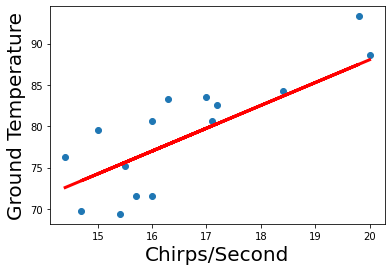

In [ ]:
plt.scatter(x,y)                     
y_new = regressor.coef_*x + regressor.intercept_            
plt.plot(x,y_new, 'r',lw=3, label='regression line') 
                                                     
plt.xlabel('Chirps/Second', fontsize=20)      
plt.ylabel('Ground Temperature', fontsize=20)       
plt.show()

**5. Interpolate data:  With a listening device, you discovered** **that on a particular morning the crickets were** **chirping at a rate of 18 chirps per second.  What was  the approximate ground temperature that morning?** 

In [ ]:
regressor.predict([[18]])  

array([82.51883599])

**Chirping rate** = 18 chirps per second 

**Ground temperature** = 83.407 (approximately).

***Extrapolation data***

**4. Extrapolate data:  If the ground temperature reached 95,** **then at what approximate rate would you expect the crickets** **to be chirping?**

In [ ]:
X = df.loc[:, ['Ground Temperature']].values
y = df.loc[:,'Chirps/Second'].values 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y = regressor.predict([[95]])
print(y)

[20.0354205]


By interchange the feature and target columns,if the ground temperature reached 95 --> I predicted the chirps/second as 20.03.

**The ground temperature** = 95

**Approximate rate of chirping** = 20.035

***comparing the actual and predicted values***

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,69.7,73.415652
1,82.6,80.312003
2,93.3,87.484209
3,80.6,77.001755
4,83.5,79.760295


***Evaluation Metric***

**3. Find the equation's $R^2$ score (use the `.score` method)** **to determine whether the**
**equation is a good fit for this data. (0.8 and greater is** **considered a strong correlation.)** 










In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7185602382599654


**The evaluation metric R2 square value of linear regresssion is 71%.**

**The correlation value is greater than 0.8.**

**It represents strong correlation.** 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df1 = pd.read_fwf("/content/brain_body.txt")
df1.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df1.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
df1.shape

(62, 2)

***Checking NULL values***

In [ ]:
df1.isnull().sum()

Brain    0
Body     0
dtype: int64

There is no null values in the data

***Dropping the Duplicate values***

In [ ]:
df1 = df1.drop_duplicates()

***Checking the Datatypes***

In [ ]:
df1.dtypes

Brain    float64
Body     float64
dtype: object

***Finding outliers in Brain column***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


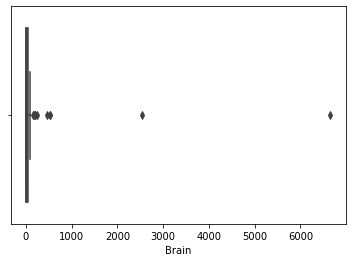

In [ ]:
import seaborn as sns 
sns.boxplot(df1['Brain'])

***Calculating IQR***

In [ ]:
percentile25 = df1['Brain'].quantile(0.25)
percentile75 = df1['Brain'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  0.6000000000000001
75th percentile of the data is  48.2025
IQR : 47.6025


***Calculating min max Values***

In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

119.60625
-70.80375000000001


***Cleaning Outliers by using Capping Technique***

In [ ]:
df1['Brain'] = np.where(
    df1['Brain']>max_value,
    max_value,
    np.where(
        df1['Brain']<min_value,
        min_value,
        df1['Brain']
    ) 
)
df1['Brain'].describe()

count     62.000000
mean      29.176476
std       45.213842
min        0.005000
25%        0.600000
50%        3.342500
75%       48.202500
max      119.606250
Name: Brain, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


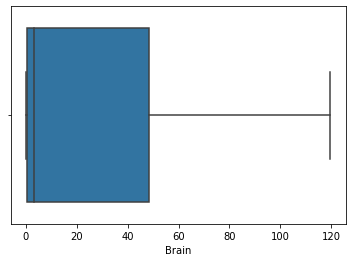

In [ ]:
sns.boxplot(df1['Brain'])

***Finding outliers in Body column***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


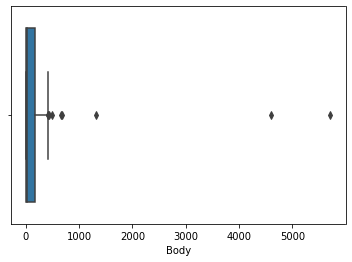

In [ ]:
sns.boxplot(df1['Body'])

***Finding IQR***

In [ ]:
percentile25 = df1['Body'].quantile(0.25)
percentile75 = df1['Body'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  4.25
75th percentile of the data is  166.0
IQR : 161.75


***Calculating min max Values***

In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

408.625
-238.375


***Cleaning Outliers by using Capping Technique***

In [ ]:
df1['Body'] = np.where(
    df1['Body']>max_value,
    max_value,
    np.where(
        df1['Body']<min_value,
        min_value,
        df1['Body']
    ) 
)
df1['Body'].describe()

count     62.000000
mean     104.676532
std      148.635231
min        0.140000
25%        4.250000
50%       17.250000
75%      166.000000
max      408.625000
Name: Body, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


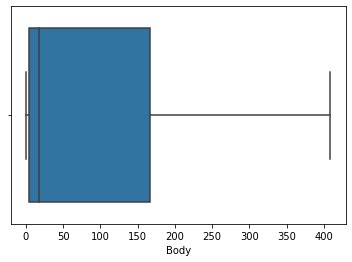

In [ ]:
sns.boxplot(df1['Body'])

No Ouliers in the data.

***Checking Linear Relationship***

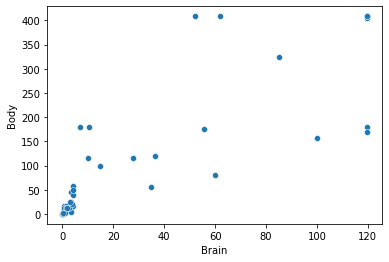

In [ ]:
sns.scatterplot(data=df1,x='Brain',y='Body')

In [ ]:
df1.corr()

,Brain,Body
Brain,1.00000,0.88824
Body,0.88824,1.00000


There is a linear relationship between brain and body => we can go ahead and develop a linear regression model. No transformation required.

In [ ]:
df1.Body.values

array([4.45000e+01, 1.55000e+01, 8.10000e+00, 4.08625e+02, 1.19500e+02,
       1.15000e+02, 9.82000e+01, 5.50000e+00, 5.80000e+01, 6.40000e+00,
       4.00000e+00, 5.70000e+00, 6.60000e+00, 1.40000e-01, 1.00000e+00,
       1.08000e+01, 1.23000e+01, 6.30000e+00, 4.08625e+02, 3.00000e-01,
       4.08625e+02, 4.08625e+02, 3.50000e+00, 1.15000e+02, 2.56000e+01,
       5.00000e+00, 1.75000e+01, 4.08625e+02, 4.06000e+02, 3.25000e+02,
       1.23000e+01, 4.08625e+02, 4.08625e+02, 3.90000e+00, 1.79000e+02,
       5.60000e+01, 1.70000e+01, 1.00000e+00, 4.00000e-01, 2.50000e-01,
       1.25000e+01, 4.08625e+02, 1.21000e+01, 1.75000e+02, 1.57000e+02,
       4.08625e+02, 1.79500e+02, 2.40000e+00, 8.10000e+01, 2.10000e+01,
       3.92000e+01, 1.90000e+00, 1.20000e+00, 3.00000e+00, 3.30000e-01,
       1.80000e+02, 2.50000e+01, 1.69000e+02, 2.60000e+00, 1.14000e+01,
       2.50000e+00, 5.04000e+01])

***Splitting the data***

In [ ]:
X = df1.loc[:, ['Brain']].values  
y = df1.loc[:, 'Body'].values 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

In [ ]:
y_test

array([1.08000e+01, 8.10000e+00, 5.60000e+01, 4.08625e+02, 4.08625e+02,
       4.08625e+02, 3.25000e+02, 1.23000e+01, 1.70000e+01, 1.40000e-01,
       1.57000e+02, 4.08625e+02, 6.30000e+00, 4.08625e+02, 2.10000e+01,
       3.00000e+00, 4.00000e+00, 4.08625e+02, 6.60000e+00])

In [ ]:
X_train.shape, X_test.shape

((43, 1), (19, 1))

***Scaling the data***

In [ ]:
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

Scaling is not required for linear regression.

In [ ]:
X_test

array([[3.5000000e+00],
       [1.3500000e+00],
       [3.5000000e+01],
       [1.1960625e+02],
       [6.2000000e+01],
       [1.1960625e+02],
       [8.5000000e+01],
       [7.5000000e-01],
       [4.0500000e+00],
       [5.0000000e-03],
       [1.0000000e+02],
       [1.1960625e+02],
       [1.7000000e+00],
       [1.1960625e+02],
       [3.6000000e+00],
       [1.2200000e-01],
       [1.0100000e-01],
       [1.1960625e+02],
       [1.0000000e+00]])

***Modelling***

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

***Finding intercept and coefficient***

In [ ]:
print(lr.intercept_)

24.51469379469316


In [ ]:
print(lr.coef_)

[2.5821627]


**1. Find the linear regression equation for this data for brain weight to body weight.**

In [ ]:
m = lr.intercept_
c = lr.coef_
print("m :",m)
print("c :",*c) 
#y = mx+c
x = float(input())
Y = lr.predict([[x]])
print("Y :",*Y)      #linear equation of this data.

m : 24.51469379469316
c : 2.582162695388701
3.385
Y : 33.255314518583916


**2. Chart the original data and the equation on the chart.**

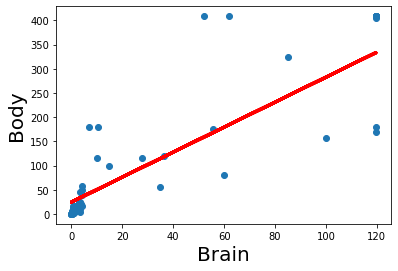

In [ ]:
plt.scatter(X,y)                     
y_new = lr.coef_*X + lr.intercept_            
plt.plot(X,y_new, 'r',lw=3, label='regression line') 
                                                     
plt.xlabel('Brain', fontsize=20)      
plt.ylabel('Body', fontsize=20)       
plt.show()

***Finding Predicted Values***

In [ ]:
y_pred = lr.predict(X_test) 

y_pred

array([ 33.55226323,  28.00061343, 114.89038813, 333.35749068,
       184.60878091, 333.35749068, 243.9985229 ,  26.45131582,
        34.97245271,  24.52760461, 282.73096333, 333.35749068,
        28.90437038, 333.35749068,  33.8104795 ,  24.82971764,
        24.77549223, 333.35749068,  27.09685649])

In [ ]:
lr.predict([[4603]]) # perils of extrapolation

array([11910.20958067])

***Comparing actual and predicted values***

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,10.800,33.552263
1,8.100,28.000613
2,56.000,114.890388
3,408.625,333.357491
4,408.625,184.608781
5,408.625,333.357491
6,325.000,243.998523
7,12.300,26.451316
8,17.000,34.972453
9,0.140,24.527605


***Evaluation Metric***

**3. Find the equation's $R^2$ score (use the `.score` method** **to determine whether the**
**equation is a good fit for this data. (0.8 and greater is**  **considered a strong correlation.)** 

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8299815065706626


**The evaluation metric R2 square value of linear regresssion is 82.99%.**

**The correlation value is greater than 0.8.**

**It represents strong correlation.** 

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df2 = pd.read_fwf("/content/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df2.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df2.shape

(52, 6)

In [ ]:
df2.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


***Checking NULL Values***

In [ ]:
df2.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

***Dropping Duplicates***

In [ ]:
df2 = df2.drop_duplicates()

***Checking datatypes***

In [ ]:
df2.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

***Finding Outliers***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


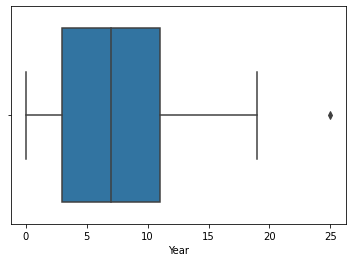

In [ ]:
import seaborn as sns 
sns.boxplot(df2['Year'])

***Calculating IQR***

In [ ]:
percentile25 = df2['Year'].quantile(0.25)
percentile75 = df2['Year'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  3.0
75th percentile of the data is  11.0
IQR : 8.0


***Finding Min Max Values***

In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

23.0
-9.0


***Cleanng Outliers By Using Capping Technique***

In [ ]:
df2['Year'] = np.where(
    df2['Year']>max_value,
    max_value,
    np.where(
        df2['Year']<min_value,
        min_value,
        df2['Year']
    ) 
)
df2['Year'].describe()

count    52.000000
mean      7.442308
std       5.388490
min       0.000000
25%       3.000000
50%       7.000000
75%      11.000000
max      23.000000
Name: Year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


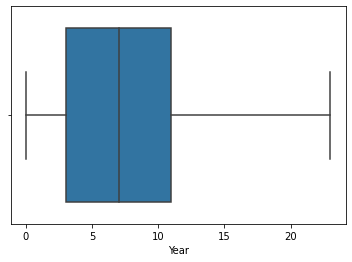

In [ ]:
sns.boxplot(df2['Year'])

No Outliers in data.

***Checking relationship between Sex feature and Salary target***

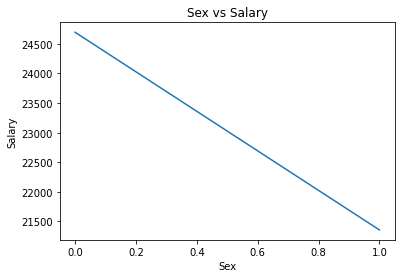

In [ ]:
df2.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

There is linear relationship in between sex and salary columns.

In [ ]:
a = df2['Sex']
a = a.map({1:'Male', 0:'Female'})


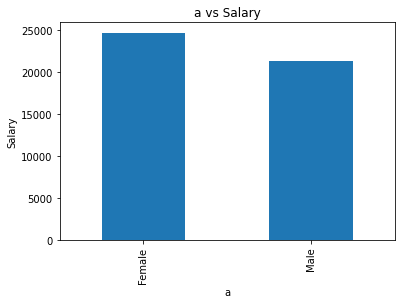

In [ ]:
df2.groupby(a)['Salary'].mean().plot(kind='bar')
plt.title('a vs Salary')
plt.xlabel('a')
plt.ylabel('Salary')
plt.show()

***Checking relationship between Rank feature and Salary target***

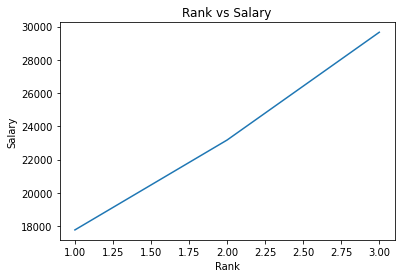

In [ ]:
df2.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [ ]:
df2[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


1) There is a linear relationship between rank and salary
2) As rank increases, salary also incerases which is in-line with our GK
3) No transformation required

***Checking relationship between Year feature and Salary target***

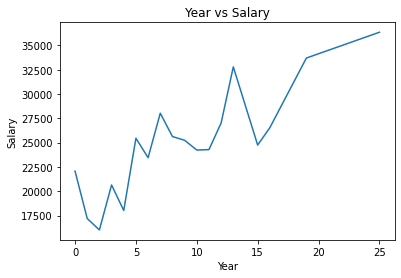

In [ ]:
df2.groupby('Year')['Salary'].mean().plot()
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [ ]:
df2[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


1) There is a linear relationship between year and salary
2) As year increases, salary also incerases which is in-line with our GK
3) No transformation required

***Checking relationship between Degree feature and Salary target***

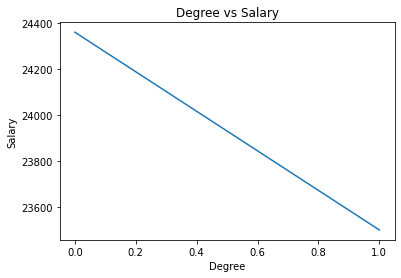

In [ ]:
df2.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

1) There is linear relationship between degree and salary

***Checking relationship between YSdeg feature with Salary target***

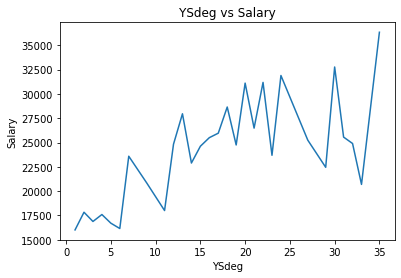

In [ ]:
df2.groupby('YSdeg')['Salary'].mean().plot()
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [ ]:
df2[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


1) There is a linear relationship between ysdeg and salary
2) As year increases, salary also incerases which is in-line with our GK
3) No transformation required

**Splitting the data**

In [ ]:
X = df2[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']].values 
y = df2['Salary'].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [ ]:
scaler.var_

array([  0.20701963,   0.7507436 ,  30.3902439 ,   0.21653778,
       109.58477097])

**Model fitting**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred

array([36789.33174997, 36165.6355472 , 60077.53153172, 33632.91939326,
       50625.4770895 , 45619.03474875, 33739.36592094, 43211.29222497,
       52852.61829643, 68864.31143419, 55974.04939598])

**1.Find the linear regression equation for this data using columns 1-5 to column 6.**




In [ ]:
m=regressor.coef_
c=regressor.intercept_
y=regressor.predict([[1,3,7,1,27]]) #y=mx+c
print('y=',y)

y= [44054.89073216]


***Finding Coefficients and Intercept***

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,477.505951
Rank,4663.425905
Year,2426.269626
Degree,125.360914
YSdeg,-496.033054


In [ ]:
regressor.intercept_

23655.90243902439

In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
0,26182,21438.071793
1,17095,16907.551585
2,24750,26420.307923
3,22450,22765.454548
4,28200,29412.358800
5,21600,19807.126936
6,18075,16467.430709
7,23713,18364.913236
8,24800,24896.746490
9,33696,32772.357197


***Evaluation Metric***

**2. Find the selection of columns with the best $R^2$ score.**

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6623158614875558


**The evaluation metric R2 square value of linear regresssion is 66.23%.**



**3.Report whether sex is a factor in salary.**



As compared to "Rank and Year" ,"Sex" having less feature importance.But, "Sex" also playing a important role in predicting Salary.